### Grading
The final score that you will receive for your programming assignment is generated in relation to the total points set in your programming assignment item—not the total point value in the nbgrader notebook.<br>
When calculating the final score shown to learners, the programming assignment takes the percentage of earned points vs. the total points provided by nbgrader and returns a score matching the equivalent percentage of the point value for the programming assignment. <br>
**DO NOT CHANGE VARIABLE OR METHOD SIGNATURES** The autograder will not work properly if your change the variable or method signatures. 

### Validate Button
Please note that this assignment uses nbgrader to facilitate grading. You will see a **validate button** at the top of your Jupyter notebook. If you hit this button, it will run tests cases for the lab that aren't hidden. It is good to use the validate button before submitting the lab. Do know that the labs in the course contain hidden test cases. The validate button will not let you know whether these test cases pass. After submitting your lab, you can see more information about these hidden test cases in the Grader Output. <br>
***Cells with longer execution times will cause the validate button to time out and freeze. Please know that if you run into Validate time-outs, it will not affect the final submission grading.*** <br>

# Part 1. Data cleaning and Exploratory Data Analysis (EDA)

This part will practice data cleaning and Exploratory Data Analysis (EDA) using a house price dataset and mpg dataset.<br>
The first dataset is from a Kaggle competition (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview), where the task is to predict a house sale price given house features.

In [1]:
!ls

data  Module1.ipynb


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

## 1. Import data and visually inspect the table [9 pts]
### 1a) Data import and basic inspection. [5 pts]
We can import the csv data using `pd.read_csv()` function. We can use `df.head()` and `df.tail()` to show the first and last 5 entries. `df.iloc[[3,5,7]]` shows the entries corresponding to the index 3,5,7. 
What is the maximum value of the feature `MSSubClass` among the last 10 entries? Update the value of `maxval` to the correct integer value.

In [3]:
df = pd.read_csv('data/house_data.csv') #it is the same data as the kaggle competition's train.csv.

print(df.iloc[[1450,1451,1452,1453,1454,1455,1456,1457,1458,1459]])
maxval=180
print(maxval)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1450  1451          90       RL         60.0     9000   Pave   NaN      Reg   
1451  1452          20       RL         78.0     9262   Pave   NaN      Reg   
1452  1453         180       RM         35.0     3675   Pave   NaN      Reg   
1453  1454          20       RL         90.0    17217   Pave   NaN      Reg   
1454  1455          20       FV         62.0     7500   Pave  Pave      Reg   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1450         Lvl    AllPub  ...        0    NaN    N

In [61]:
# this cell tests that you correctly updated maxval

### 1b) df.info() gives the overview of the data frame. Inspect the data using df.info() and answer below questions. [4 pts]
#### 1b-i) Which column is the target? 
#### 1b-ii) How many features are in the data? Exclude the target. (Id is not a useful feature, but let's still include)
#### 1b-iii) How many observations (samples) are in the data? 
#### 1b-iv) How many features have null values based on the data overview?

In [4]:
df.info()


# uncomment and update to the correct string value
# copy directly from the uneditd df column name (e.g., 'LandContour')
ANS_1b1 = 'SalePrice' 
# uncomment and update to the correct integer value
ANS_1b2 = 80
# uncomment and update to the correct integer value
ANS_1b3 = 1460
# uncomment and update to the correct integer value 
ANS_1b4 = 19 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# this cell will test your solutions to the four questions above

## 2. Inspect Null values [16 pts]
The empty values in the data are called null values. Null values can take different forms.
Have a look at below example. `np.nan` and `None` are native null values in python. They get displayed differently in the pandas dataframe (`pd.DataFrame`) though. But there are other data types such as empty list, empty dictionary, etc and string values that literally says "null" or that are empty spaces.
Depending on how messy the data is, sometimes the table may have null values of one or more kinds, and those can be cleaned manually or automatically if you can write a code to include all possible cases which meanings are null values. 

In [6]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
nulldemo = pd.DataFrame(a)
nulldemo

,0
0,NaN
1,None
2,[]
3,{}
4,NaN
5,Null
6,NULL
7,None
8,NA
9,?


`.isnull()` method applied to pandas dataframe or series can detect null values. `.dropna()` method in pandas will detect null values and can be specified to drop either rows or columns that contain null values. Below shows that `.isnull()` only detects the python-native null values and cannot detect other forms (string value) of variables that meant null.

In [7]:
nulldemo.isnull()

,0
0,True
1,True
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


Also, sometimes the python-native null values can have an odd data type such as numpy float. 

In [8]:
print(df['MasVnrArea'].iloc[234], df['MasVnrArea'].iloc[234].dtype, type(df['MasVnrArea'].iloc[234]))
print(df['MasVnrArea'].isnull().iloc[234])
print(np.isnan(df['MasVnrArea'].iloc[234])) 
print(math.isnan(df['MasVnrArea'].iloc[234]))
print(df['MasVnrArea'].iloc[234]==np.nan)
print(df['MasVnrArea'].iloc[234]==np.float64(np.nan))

nan float64 <class 'numpy.float64'>
True
True
True
False
False


np.isnan() and math.isnan() can detect the nan values with numpy float type, but they will cause errors with native `None` or a string value. Uncomment one of below (one at a time) and run. You'll see error messages.

In [12]:
# your code here


# print(np.isnan(None))
# print(np.isnan('None'))
# print(math.isnan(None))
# print(math.isnan('None'))

### 2a) Check null values type [5 pts]
Let's check if our data has clean null values (one kind) or messy null values (multiple different representations). Run the codes below and visually inspect the printed results. Which column has string-typed null/none values and how many elements are string-typed null/none values?

In [9]:
# prints number of null values detected by .isnull() and string none
for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    print(c, df[c].isnull().sum(), string_null.sum()) 

Id 0 0
MSSubClass 0 0
MSZoning 0 0
LotFrontage 259 0
LotArea 0 0
Street 0 0
Alley 1369 0
LotShape 0 0
LandContour 0 0
Utilities 0 0
LotConfig 0 0
LandSlope 0 0
Neighborhood 0 0
Condition1 0 0
Condition2 0 0
BldgType 0 0
HouseStyle 0 0
OverallQual 0 0
OverallCond 0 0
YearBuilt 0 0
YearRemodAdd 0 0
RoofStyle 0 0
RoofMatl 0 0
Exterior1st 0 0
Exterior2nd 0 0
MasVnrType 8 864
MasVnrArea 8 0
ExterQual 0 0
ExterCond 0 0
Foundation 0 0
BsmtQual 37 0
BsmtCond 37 0
BsmtExposure 38 0
BsmtFinType1 37 0
BsmtFinSF1 0 0
BsmtFinType2 38 0
BsmtFinSF2 0 0
BsmtUnfSF 0 0
TotalBsmtSF 0 0
Heating 0 0
HeatingQC 0 0
CentralAir 0 0
Electrical 1 0
1stFlrSF 0 0
2ndFlrSF 0 0
LowQualFinSF 0 0
GrLivArea 0 0
BsmtFullBath 0 0
BsmtHalfBath 0 0
FullBath 0 0
HalfBath 0 0
BedroomAbvGr 0 0
KitchenAbvGr 0 0
KitchenQual 0 0
TotRmsAbvGrd 0 0
Functional 0 0
Fireplaces 0 0
FireplaceQu 690 0
GarageType 81 0
GarageYrBlt 81 0
GarageFinish 81 0
GarageCars 0 0
GarageArea 0 0
GarageQual 81 0
GarageCond 81 0
PavedDrive 0 0
WoodDeckSF

Which column has string-typed null/none values? 

In [10]:
# your code here

# uncomment and update to the correct string value
col = 'MasVnrType'

How many elements are string-typed null/none values?

In [11]:
# your code here

# uncomment and update to the correct string value
string_null_count = 864

In [16]:
# this cell will test your answer about the column with string-typed null/none values
# and the number of string-typed null/none values

### 2b) Inspect observations (rows) with null values. How many observations have at least one missing value? [5 pts]

In [12]:
# your code here


# uncomment and update to the correct integer value
rows_with_nulls = 1460

In [18]:
# this cell will test your answer about the number of rows with null values

### 2c) Make a histogram of null counts [6 pts]
+ The ***histogram x-axis*** is the null value count range. Please use bins with width = 50 (e.g. bins are [0,50,100, ...,1550])
+ The ***histogram y-axis*** is the count of features with the number of null values within the histogram bin range. For example, if 10 feature columns have numbers of null values between 0 and 50, then the first box's y-value is 10 in the plot. <br>

**Hint**: matplotlib library has a function .hist that can plot histograms

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


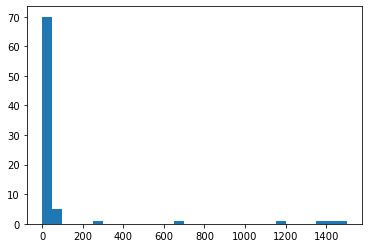

In [13]:
# your code here

# Please uncomment and update
# do not change the names of the variables from null_counts and histogram
null_counts=pd.Series([])
#for c in df.columns:
    #string_null = np.array([x in a[2:] for x in df[c]])
    #null_counts[c]=df[c].isnull().sum()# + string_null.sum()
null_counts = df.isnull().sum(axis=0)

print(null_counts)

histogram = plt.hist(null_counts, bins=np.arange(0,1550,50))# replace the histogram to be the plt.hist() object.
# Hint: Use .isnull() and sum over True values on columns.
# You can make it as short as 2-3 lines of code


In [91]:
# hidden test 1; tests null_counts


In [92]:
# hidden test 2; tests histogram

## 3. Imputing missing values [33 pts]

In this part, we will decide methods to clean the data with missing values.    

Complete case analysis (CCA) is to drop any observations (rows) that have null values. It is suitable if the number of observations with null values are very small (say, less than 5%) compared to the total number of observations.  

If the data has a large number of features (columns) and the model(s) does not need that many features (some models work better with less number of features), we can consider dropping features that have many missing values. Before dropping features, it is generally a good idea checking whether the feature with missing values is important feature or not (which may need the analyst's judgement). If the feature is very important for the prediction task (for example, a house size when predicting house price) but has a large amount of missing values, we cannot simply drop the feature, or in a rare case, it could mean that the data is not suitable for the analysis. One will have to work with only the observations that has values on that feature given the number of observations is sufficient, or collect more data. If we know that those features are not very important and have a large number of missing values, we can drop the features. As a rule of thumb, features with missing values more than either 5% or 10% can be dropped.

### 3a) Is the data suitable for complete case analysis or not? [5 pts]

In [93]:
# your code here


# uncomment and update to string 'no' or 'yes'
suitable_cca = 'no'

In [94]:
# tests solution for whether data is suitable for CCA

### 3b) Dropping feature columns [20 pts]
**Imputation** is the process of replacing missing data with substituted values. Let's assume we want to keep columns where 5% or less of the values are null (***keep and impute***) and discard any column where more than 5% of the values are null (***throw***). Treat the string type "None" as a category and not a null value.

#### 3b-i) According to above condition, how many features can be kept and imputed? [5 pts]
#### 3b-ii) Which columns have null values 5% or less of total, so we can impute? [5 pts] 
#### 3b-iii) Which columns have null vaues more than 5% of total, so we should throw? [5 pts]

In [95]:
# your code here
# Complete the codes below by uncommenting and changing the values of features_to_impute and features_to_throw. 
# Each should be a list of feature names (e.g. ['LotFrontage','Alley',...]). Do not change the variable names. 
# There are hidden tests which will grade above three questions.

features_to_impute =['MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical']
features_to_throw = ['LotFrontage','Alley','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
print(len(features_to_impute), features_to_impute)
print(len(features_to_throw), features_to_throw)

8 ['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']
11 ['LotFrontage', 'Alley', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [96]:
# Hidden test for 3b-i

In [97]:
# Hidden test for 3b-ii

In [98]:
# Hidden test for 3b-iii

### 3b-iv) Remove the columns according to the above result. Replace the `df` with the new result. Also remove `Id` column as it's not a useful feature. [5 pts]

In [99]:
# your code here

# remove the columns according to the above result, replace df with the new results
# also remove ID column as it's not a useful feature
df.drop(columns=features_to_throw)
for c in features_to_throw:
    del df[c]
    
del df["Id"]
print (df)

      MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0             60       RL     8450   Pave      Reg         Lvl    AllPub   
1             20       RL     9600   Pave      Reg         Lvl    AllPub   
2             60       RL    11250   Pave      IR1         Lvl    AllPub   
3             70       RL     9550   Pave      IR1         Lvl    AllPub   
4             60       RL    14260   Pave      IR1         Lvl    AllPub   
...          ...      ...      ...    ...      ...         ...       ...   
1455          60       RL     7917   Pave      Reg         Lvl    AllPub   
1456          20       RL    13175   Pave      Reg         Lvl    AllPub   
1457          70       RL     9042   Pave      Reg         Lvl    AllPub   
1458          20       RL     9717   Pave      Reg         Lvl    AllPub   
1459          20       RL     9937   Pave      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch  \
0       Inside   

In [100]:
# tests that you properly updated df 

### 3c) Impute missing data [8 pts]
Before imputing columns, we need to think about what methods to use to impute columns.
The imputation strategy can be different depending on the variable types and variable value distribution. There are many imputation techniques, but let's use a few simple ones.    

For a numerical variable imputation, we impute mean value if the distribution is symmetric while we use median value to impute when the distribution is skewed. Another method is to assign an arbitrary value that's outside the normal range. Though it can be useful to capture missingness, but it can create outliers. Both mean/median and arbitrary imputation methods are simple to use and suitable when missing values are 5% (no more than 10%) as a rule of thumb. Both methods can distort the original distribution.

For a categorical variable imputation, we can impute with the most frequent categorical value. It is a simple method but it can distort the original distribution. 
It is also possible to create a "missing" category to capture missingness. The advantage of using missing category is that it captures missingness but its disadvantage is that it creates another rare category. 

Below code shows histograms of feature columns that we can impute.

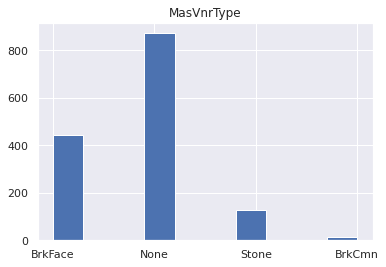

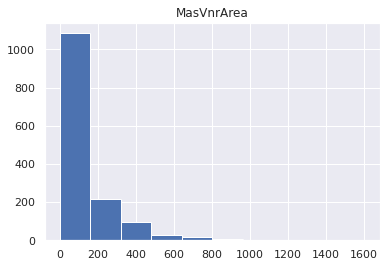

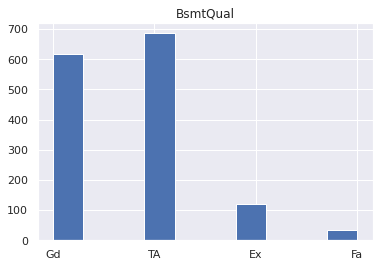

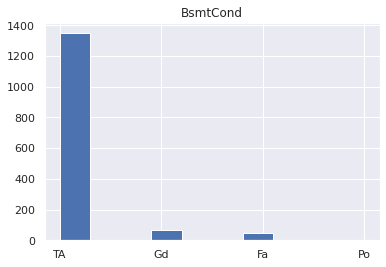

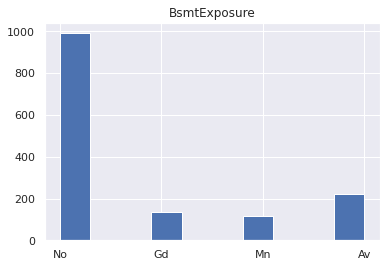

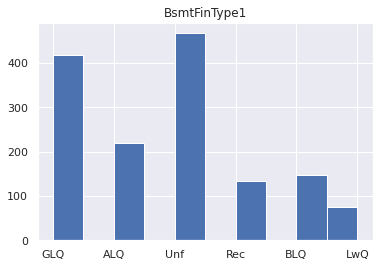

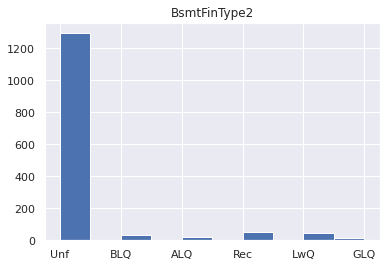

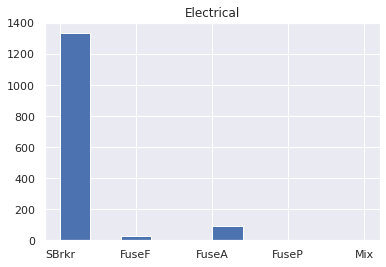

In [106]:
for c in features_to_impute:
    df[c].hist()
    plt.title(c)
    plt.show()

### 3c-i) Impute missing data for features in `features_to_impute`. Choose an appropriate method among mean or median imputation methods for numerical variable(s) and frequentest value imputation for categorical variable(s). [8 pts]
You can inspect variable types by eyes, or use below code as a help. Replace those columns with imputed values. Do not change the column name or the data frame name. Do not add new columns to the data frame.     
Hint: You can use .mode() function to find the most frequent value in a Series.    
Hint: You may use .fillna() function on each feature Series.

In [75]:
for c in features_to_impute:
    print(c, len(df[c].unique()), df[c].dtype)

MasVnrType 5 object
MasVnrArea 328 float64
BsmtQual 5 object
BsmtCond 5 object
BsmtExposure 5 object
BsmtFinType1 7 object
BsmtFinType2 7 object
Electrical 6 object


In [76]:
# your code here

a = df['BsmtExposure'].mode()

print(a)




# use this cell for potential debugging

0    No
dtype: object


In [105]:
# impute missing data 
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0.0)
df['BsmtQual'] = df['BsmtQual'].fillna('TA')
df['BsmtCond'] = df['BsmtCond'].fillna('TA')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('Unf')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('Unf')
df['Electrical'] = df['Electrical'].fillna('SBrkr')

print(df['Electrical'].isnull().sum())
print(df['MasVnrArea'])

0
0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64


In [83]:
# tests 'MasVnrType' and 'MasVnrArea'


In [84]:
# tsts 'BsmtQual' and 'BsmtCond'

In [85]:
# tests 'BsmtExposure' and 'BsmtFinType1'


In [86]:
# tests 'BsmtFinType2' and 'Electrical'

# Part 2. EDA, Simple Linear Regression

In this part, we will use a simplified data and create a simple linear regression model. The dataset can be downloaded from https://www.kaggle.com/harlfoxem/housesalesprediction/download.    
This dataset contains house sale prices for Kings County, which includes Seattle. It includes homes sold between May 2014 and May 2015. There are several versions of the data. Some additional information about the columns is available here: https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/, some of which are copied below.

|Variable |	Description|
|:---------|:-------------|
|id 	|Identification|
|date |	Date sold|
|price |	Sale price|
|bedrooms |	Number of bedrooms|
|bathrooms |	Number of bathrooms|
|sqft_liv |	Size of living area in square feet|
|sqft_lot| 	Size of the lot in square feet|
|floors |	Number of floors|
|waterfront |	‘1’ if the property has a waterfront, ‘0’ if not.|
|view |	An index from 0 to 4 of how good the view of the property was|
|condition |	Condition of the house, ranked from 1 to 5|
|grade |	Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value.|
|sqft_above |	Square feet above ground|
|sqft_basmt |	Square feet below ground|
|yr_built 	|Year built|
|yr_renov |	Year renovated. ‘0’ if never renovated|
|zipcode |	5 digit zip code|
|lat 	|Latitude|
|long 	|Longitude|
|squft_liv15 |	Average size of interior housing living space for the closest 15 houses, in square feet|
|squft_lot15 |	Average size of land lost for the closest 15 houses, in square feet|

In [102]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

In [103]:
df2 = pd.read_csv('data/house_data_washington.csv')

## 4. Munging data [15 pts]
### 4a) Date string to numbers [5 pts]
Inspect the data frame and data type of each column. The column 'date' is the date sold, and has string value. We will extract year and month information from the string. 
In the data frame df2, create new features 'sales_year' and 'sales_month'.

In [38]:
# extract year and month info from the string
# create new features 'sales_year' and 'sales_month' in df2
df2['sales_year'] = df2.date.apply(lambda x: int(x[:4]))
df2['sales_month'] = df2.date.apply(lambda x: int(x[4:6]))
print(df2.groupby('sales_month')['id'].count())
print(df2.groupby('sales_year')['id'].count())

sales_month
1      978
2     1250
3     1875
4     2231
5     2414
6     2180
7     2211
8     1940
9     1774
10    1878
11    1411
12    1471
Name: id, dtype: int64
sales_year
2014    14633
2015     6980
Name: id, dtype: int64


Which month has the most number of sales?

In [39]:
# your code here

# uncomment and update string with capitalized month, e.g., 'December'
most_sales = 'May'

Which months has the least number of sales?

In [40]:
# your code here

# uncomment and update string with capitalized month, e.g., 'December'
least_sales = 'January'

In [41]:
# tests solutions for most_sales and least_sales

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### 4b) Variable types [5 pts]
Inspect each feature's data type and variable type. What is the best description for the variable type of following features? Update the string to 'numeric' or 'categorical'.

In [43]:
# your code here


# uncomment the feaures below and update the strings with 'numeric' or 'categorical'
price = 'numeric'
bathrooms = 'numeric'
waterfront = 'categorical'
grade = 'numeric'
zipcode = 'categorical'
sales_year = 'numeric'

In [44]:
# tests that you selected correct variable type for the features in 4b 

In [45]:
# this part is ungraded, but useful to run to check
# your code here

for c in df2.columns[2:]:
    print(c, df2[c].unique())


price [ 221900  538000  180000 ...  610685 1007500  402101]
bedrooms [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
bathrooms [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
sqft_living [1180 2570  770 ... 3087 3118 1425]
sqft_lot [ 5650  7242 10000 ...  5813  2388  1076]
floors [1.  2.  1.5 3.  2.5 3.5]
waterfront [0 1]
view [0 3 4 2 1]
condition [3 5 4 1 2]
grade [ 7  6  8 11  9  5 10 12  4  3 13  1]
sqft_above [1180 2170  770 1050 1680 3890 1715 1060 1890 1860  860 1430 1370 1810
 1980 1600 1200 1250 2330 2270 1070 2450 1710 1750 1400  790 2570 2320
 1190 1510 1090 1280  930 2360  890 2620 2600 3595 1570  920 3160  990
 2290 2165 1640 1000 2130 2830 2250 2420 3250 1850 1590 1260 2519 1540
 1110 1770 2720 2240 3070 2380 2390  880 1040  910 3450 2350 1900 1010
  960 2660 1610  765 3520 1290 1960 1160 1210 1270 1440 2190 2920 1460
 1170 1240 3140 2030 2310  700 1080 2520 2780 1560 1450 1

### 4c) Drop features [5 pts]
Let's drop features that are unnecessary. `id` is not a meaningful feature. `date` string has been coded to `sales_month` and `sales_year`, so we can remove `date`. `zipcode` can be also removed as it's hard to include in a linear regressio model and the location info is included in the `lat` and `long`.
Drop the features `id`, `date`, and `zipcode` and replace the df2.

In [46]:
# drop unnecessary features, replace df2
# your code here
del df2['id']
del df2['date']
del df2['zipcode']
df2


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,sales_year,sales_month
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21609,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21610,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21611,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


In [47]:
# tests that you droppd the features id, date, and zipcode from df2

## 5. More inspection; Correlation and pair plot [5 pts and Peer Review]
### 5a) Get correlation matrix on the data frame. [5 pts]
Which feature may be the best predictor of price based on the correlation? Answer as a string value (e.g. best_guess_predictor = 'price' or best_guess_predictor = 'yr_built')

In [48]:
# your code here

# uncomment and update best_guess_predictor with a string value
best_guess_predictor = 'sqft_living'

In [49]:
# tests the solution for best_guess_predictor

### 5b) Display the correlation matrix as heat map [Peer Review]
[`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) can visualize a matrix as a heatmap. Visualize the correlation matrix using seaborn.heatmap(). Play with color map, text font size, decimals, text orientation etc. If you find how to make a pretty visualization, please share in the discussion board. You will upload your correlation matrix in the Peer Review assigment for the week. <br>
**Note:** your code for this section may cause the Validate button to time out. If you want to run the Validate button prior to submitting, you could comment out the code in this section after completing the Peer Review.

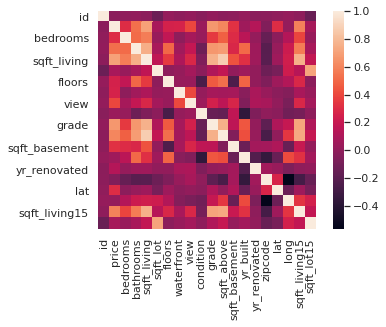

In [108]:
# practice visualizing correlation matrix using a heatmap
# your code here
#uniform_data = np.random.rand(10, 12)
data = df2.corr()
sns.heatmap(data, square=True)

### 5c) Pair plot [Peer Review]
Pair plot is a fast way to inspect relationships between features. Use seaborn's .pairplot() function to draw a pairplot if the first 10 columns (including price) and inspect their relationships. Set the diagonal elements to be KDE plot. You will upload your pair plot in this week's Peer Review assignment. <br>
**Note:** your code for this section may cause the Validate button to time out. If you want to run the Validate button prior to submitting, you could comment out the code in this section after completing the Peer Review.

In [ ]:
# practice inspecting relationships between features using a pair plot. 
# your code here
print(df2)
sns.pairplot(df2, vars=('price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade'))

        price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0      221900         3       1.00         1180      5650     1.0           0   
1      538000         3       2.25         2570      7242     2.0           0   
2      180000         2       1.00          770     10000     1.0           0   
3      604000         4       3.00         1960      5000     1.0           0   
4      510000         3       2.00         1680      8080     1.0           0   
...       ...       ...        ...          ...       ...     ...         ...   
21608  360000         3       2.50         1530      1131     3.0           0   
21609  400000         4       2.50         2310      5813     2.0           0   
21610  402101         2       0.75         1020      1350     2.0           0   
21611  400000         3       2.50         1600      2388     2.0           0   
21612  325000         2       0.75         1020      1076     2.0           0   

       view  condition  gra

## 6. Simple linear regression [Peer Review]

### 6a) Data preparation [Peer Review]
We will split the data to train and test datasets such that the test dataset is 20% of original data.
Use `sklearn.model_selection.train_test_split` function to split the data frame to X_train and X_test. X_train is 80% of observation randomly chosen. X_test is the rest 20%. Both X_train and X_test are `pd.DataFrame` object and include 'price' in the table. Note that the train_test_split can handle data frame as well as array.

In [ ]:
# your code here

# use sklearn.model_selecttion.train_test_split to split the data frame 
# X_train is 80% of the observations; X_test is 20% of the observations
# print length of X_train and X_test
import sklearn
from sklearn.model_selection import train_test_split
data = sklearn.model_selection.train_test_split(df2, test_size=0.2, train_size=0.8)

data_train = data[0]
data_test = data[1]
print('Length of X_train ',17290)
print('Length of X_test ', 4323)

In [ ]:
# instructor testing cell 
# your code here


### 6b) Train a simple linear regression model [Peer Review]
Use the best_guess_predictor as a single predictor and build a simple linear regression model using `statsmodels.formula.api.ols` function (https://www.statsmodels.org/dev/example_formulas.html)
Print out the result summary. Train on the X_train portion. What is the adjusted R-squared value?

In [ ]:
# use best_guess_predictor as a single predictor
# build a simple linear regression model, train on the X_train portion
# your code here
import statsmodels.api as sm
import statsmodels.formula.api as smf

# model = 
adj_R2 = smf.ols(formula='price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade', data=data_train)
res = adj_R2.fit()
print(res.summary())

### 6c) Best predictor [Peer Review]
In question 5a, we picked a best guess predictor for price based on the correlation matrix. Now we will consider whether the best_guess_predictor that we used is still the best.<br>
Print out a list ranking all of the predictors. Then print out a list of the top three predictors in order.<br>      
Hint: Linear regression uses adjusted R squared as fit performance. <br>
In this week's Peer Review, answer the following questions: What were your top three predictors? How did you order your list of predictors to select those as the top ones? Is your top predictor for this section the same as the best guess predictor you selected in question 5a? 

In [ ]:
# your code here

# uncomment and update top_three
# top_three = []

In [ ]:
# instructor testing cell 
# your code here
